# Homework 5 -- Problem 2

In [1]:
#imports
from importlib import reload

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import ventilated_thermocline

In [2]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
def contour_plot(field, title=None, cmap='jet', nlevels=8, clabel=True, ax=None,
                    x=None, y=None, shadx=None, shady=None,
                    outx2=None, outy2=None,
                    outx3=None, outy3=None,
                    RMx=None, RMy=None,
                    poolx=None, pooly=None):
    cm = plt.get_cmap(cmap)
    if ax is None:
        fig = plt.figure(figsize=(10,10))
        ax = plt.gca()

    if x is not None:
        CS = ax.contour(field.T, levels=nlevels, cmap=cm,
                       extent=(x.min(), x.max(), y.min(), y.max()))
        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())
    else:
        CS = ax.contour(field.T, levels=nlevels, cmap=cm)
        
    # Lines
    if shadx is not None:
        ax.plot(shadx, shady, 'k-', label='Shadow zone')

    if outx2 is not None:
        ax.plot(outx2, outy2, '--', color='gray', label=r'$\theta_2$')    
        
    if outx3 is not None:
        ax.plot(outx3, outy3, ':', color='gray', label=r'$\theta_3$')    
    
    if RMx is not None:
        ax.plot(RMx, RMy, 'k--', label='RM')    

    if poolx is not None:
        ax.plot(poolx, pooly, 'k:', label='Pool')    

        
    if clabel:
        ax.clabel(CS, inline=True, fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=18.)
    
    # Legend
    legend = ax.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                   fontsize=13.)


    #ax.set_aspect('equal', 'datalim')

In [17]:
def NS_plot(yarr, ixt, h, hp1, ax=None):
    if ax is None:
        fig = plt.figure(figsize=(10,8))
        ax = plt.gca()
    #
    ax.plot(yarr[ixt,:], -h[ixt, :], 'b', label=r'$z_3 = h_1 + h_2$')
    ax.plot(yarr[ixt,:], -hp1[ixt, :], 'r', label=r'$z_2 = h_1$')
    #
    ax.set_xlabel('y (km)')
    ax.set_ylabel('depth (m)')
    ax.set_title('(c) N-S cross-section')

----

# North Atlantic

In [4]:
NA_dict = dict(theta0=70., theta2=50., theta3=60., rho1=1026.0,rho2=1026.5,
        rho3=1027., Lx=5e6, W0=2e-6, H3=500., max_depth=-1200)

In [11]:
reload(ventilated_thermocline)
(xarr, yarr, shadx, shady, outx2, outy2, outx3, outy3, poolx, pooly, 
            psi1, psi2, psi3, ixt, iyt, h, hp1, hp2, RMx, RMy) = ventilated_thermocline.three_layers(**NA_dict)

/home/xavier/Projects/Oceanography/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:356: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/home/xavier/Projects/Oceanography/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:447: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/home/xavier/Projects/Oceanography/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:480: RuntimeWarning: divide by zero encountered in double_scalars
  phi_RM=phie*(1-fac*D02S*(1+Gamma12*(1-f[j]/f2)**2))
/home/xavier/Projects/Oceanography/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:528: RuntimeWarning: divide by zero encountered in double_scalars
  poolx[j] = max(phi_pool*eradius/1000, 0.)


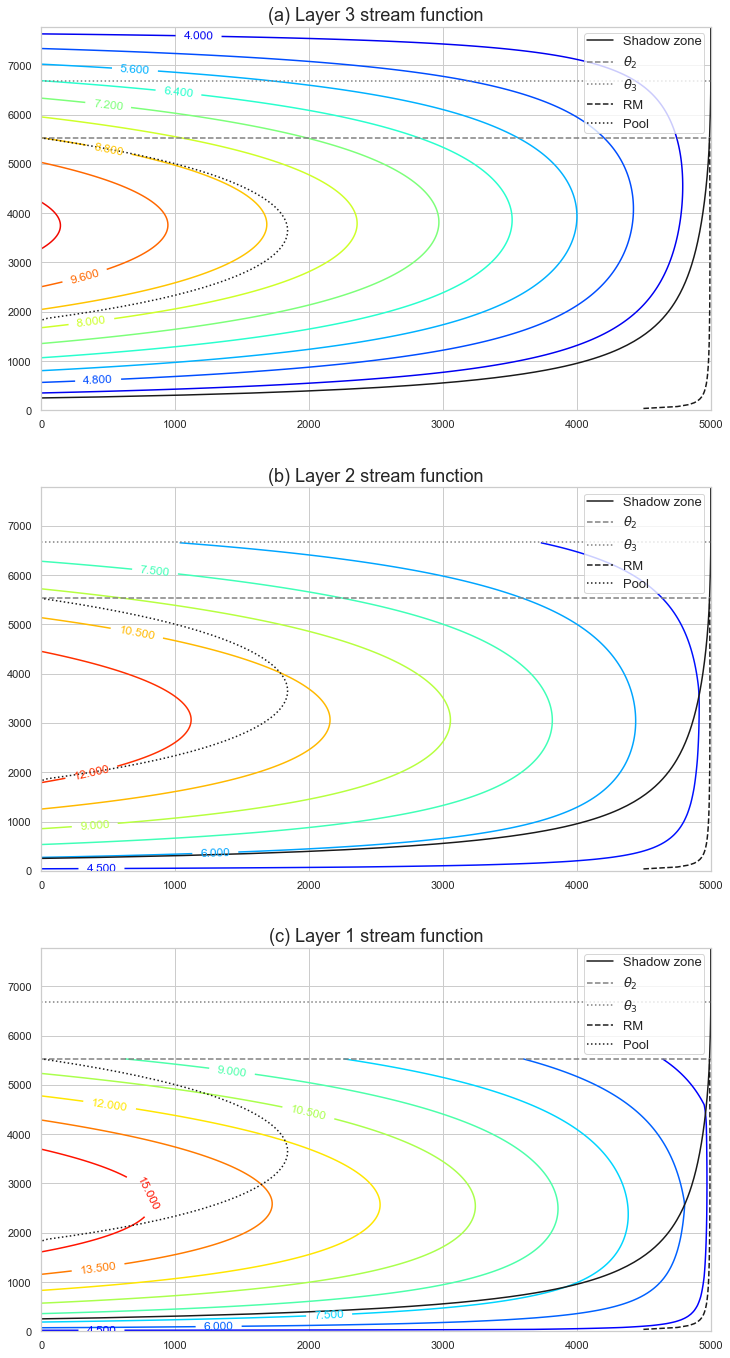

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,24))

contour_plot(psi3, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx2=outx2, outy2=outy2, poolx=poolx, pooly=pooly,
             outx3=outx3, outy3=outy3,
             RMx=RMx, RMy=RMy,
            title='(a) Layer 3 stream function', ax=ax1)

contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx2=outx2, outy2=outy2, poolx=poolx, pooly=pooly,
             outx3=outx3, outy3=outy3,
             RMx=RMx, RMy=RMy,
            title='(b) Layer 2 stream function', ax=ax2)

contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx2=outx2, outy2=outy2, poolx=poolx, pooly=pooly,
             outx3=outx3, outy3=outy3,
             RMx=RMx, RMy=RMy,
            title='(c) Layer 1 stream function', ax=ax3)

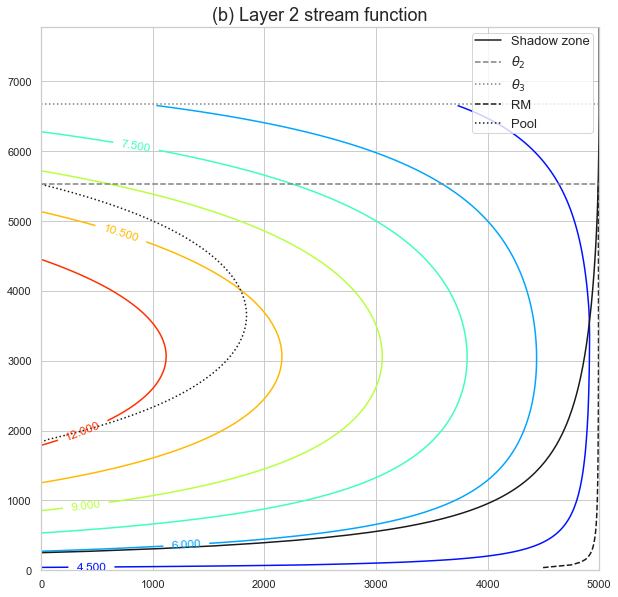

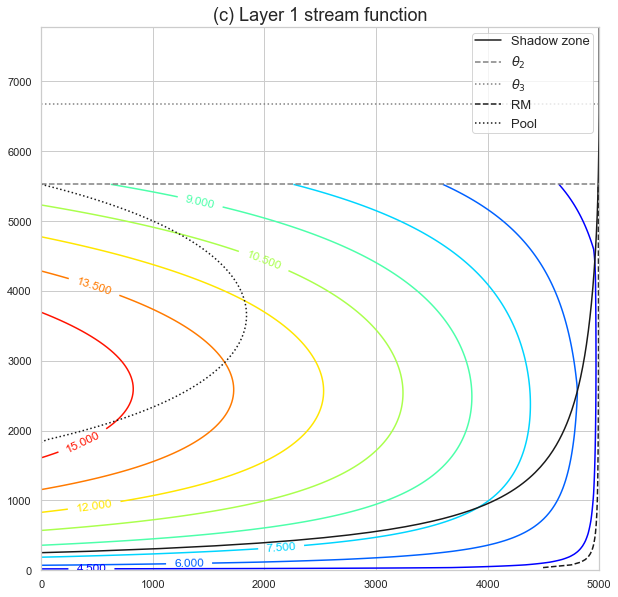